# 📈 Linear Regression - Complete Mastery Guide

## 🎯 Welcome to Your Linear Regression Journey!

This comprehensive notebook combines **theory**, **mathematics**, and **hands-on implementation** to give you complete mastery of Linear Regression - the foundation of machine learning.

## 📚 What You'll Master

By the end of this notebook, you'll understand:

1. **🧠 Core Concepts** - What linear regression is and why it matters
2. **📊 Mathematical Foundation** - The equations that make it work
3. **⚙️ Algorithm Mechanics** - How machines actually learn
4. **💻 Implementation** - Building it from scratch in Python
5. **🔍 Deep Analysis** - Function-by-function breakdown
6. **🧪 Practical Application** - Real dataset training and evaluation

## 🚀 Learning Approach

- **Theory First**: Understand the "why" before the "how"
- **Step-by-Step**: Build complexity gradually
- **Interactive**: Run code and see immediate results
- **Visual**: Plots and demonstrations throughout
- **Comprehensive**: Everything from math to implementation

Let's begin your machine learning journey! 🌟

## 🎓 Introduction & Fundamentals

### What is Linear Regression?

**Linear Regression** is a fundamental supervised machine learning algorithm that models the relationship between input features and a target variable using a straight line. It's the foundation of machine learning and forms the basis for understanding more complex algorithms.

**Core Concept**: Find the best straight line that fits through data points to make predictions.

### 🔑 Key Components:
- **Independent Variable (X)**: Input feature(s) used for prediction
- **Dependent Variable (Y)**: Target variable we want to predict
- **Linear Relationship**: Assumption that output changes at a constant rate with input
- **Best Fit Line**: The optimal line that minimizes prediction errors

### 🌟 Real-World Examples:
1. **🏠 House Price Prediction**: Price vs. Square footage
2. **💰 Sales Forecasting**: Revenue vs. Advertising spend
3. **📚 Academic Performance**: Exam score vs. Study hours
4. **💊 Medical Diagnosis**: Treatment outcome vs. Dosage

### 🎯 Why Learn Linear Regression?
1. **Foundation**: Base for all machine learning algorithms
2. **Interpretability**: Easy to understand and explain
3. **Efficiency**: Fast training and prediction
4. **Practical**: Widely used in business and research
5. **Mathematical Insight**: Teaches core ML concepts

## 📊 Mathematical Foundation

### The Linear Equation

Our goal is to find the best line: **ŷ = mx + c** (or **ŷ = θ₁x + θ₀**)

**Where:**
- **ŷ** (y-hat) = Predicted output
- **x** = Input feature
- **m** (or θ₁) = Slope/Weight (how steep the line is)
- **c** (or θ₀) = Intercept/Bias (where line crosses y-axis)

### For Multiple Features:
**ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ**

### Cost Function - Mean Squared Error (MSE)

**J(θ) = (1/n) Σ(yᵢ - ŷᵢ)²**

**Why MSE?**
- **Positive values**: Squaring eliminates negative errors
- **Penalizes large errors**: Error of 4 becomes 16 (worse than two errors of 2)
- **Smooth curve**: Creates differentiable optimization surface
- **Mathematical convenience**: Easy to calculate derivatives

### Gradient Descent - The Learning Algorithm

**Parameter Update Rules:**
- **θ₀_new = θ₀_old - α × (∂J/∂θ₀)**
- **θ₁_new = θ₁_old - α × (∂J/∂θ₁)**

**Partial Derivatives (Gradients):**
- **∂J/∂θ₀ = (2/n) Σ(ŷᵢ - yᵢ)** ← Intercept gradient
- **∂J/∂θ₁ = (2/n) Σ(ŷᵢ - yᵢ) × xᵢ** ← Slope gradient

**Learning Rate (α):**
- Controls step size during optimization
- Too high: Overshooting, instability
- Too low: Very slow learning
- Typical values: 0.001 to 0.1

## ⚙️ Algorithm Deep Dive

### The Learning Process (Step-by-Step):

1. **Initialize Parameters**
   - Start with random values for slope (m) and intercept (c)
   - Example: m = 0.5, c = -0.3

2. **Forward Propagation**
   - Make predictions using current parameters
   - Formula: ŷ = m × x + c

3. **Calculate Cost**
   - Measure prediction errors using MSE
   - Lower cost = better predictions

4. **Backward Propagation**
   - Calculate gradients (which direction to improve)
   - Determine how much to change each parameter

5. **Update Parameters**
   - Adjust parameters in direction that reduces cost
   - Use learning rate to control step size

6. **Repeat**
   - Continue until cost stops decreasing (convergence)

### 🏀 Basketball Analogy:
Think of learning to shoot a basketball:
- **Random start**: Your first shot is random (random parameters)
- **Measure error**: See how far you missed the hoop (cost function)
- **Analyze**: Figure out if you need to aim higher/lower, left/right (gradients)
- **Adjust**: Change your shooting technique slightly (parameter update)
- **Practice**: Keep repeating until you consistently hit the target (convergence)

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [4]:
url ='https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data = data.dropna()
data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


Dividing the dataset to training dataset and testing dataset 


In [6]:
# Split the data into training and testing sets
# Training data: first 500 samples
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)  # Fixed: was data.x, should be data.y

# Testing data: samples 500-699 (200 samples)
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)  # Fixed: was data.x, should be data.y

print(f"Training data shape: Input {train_input.shape}, Output {train_output.shape}")
print(f"Testing data shape: Input {test_input.shape}, Output {test_output.shape}")

Training data shape: Input (500, 1), Output (500, 1)
Testing data shape: Input (199, 1), Output (199, 1)


BUILDING THE LINEAR REGRESSION MODEL AND PLOTTING THE LINE


## Understanding Linear Regression Implementation

### What is Linear Regression?
Linear regression finds the best straight line that fits through our data points. The line equation is:
**y = mx + c**

Where:
- **m** = slope (how steep the line is)
- **c** = intercept (where line crosses y-axis when x=0)
- **x** = input value
- **y** = predicted output

### How Our Algorithm Works:
1. **Start with random guess** for m and c
2. **Make predictions** using current m and c
3. **Calculate error** between predictions and actual values
4. **Adjust m and c** to reduce the error
5. **Repeat** until error is minimal

### The Learning Process (Gradient Descent):
Think of it like rolling a ball down a hill to find the lowest point:
- The "hill" represents our error
- We want to reach the bottom (minimum error)
- We take small steps in the direction that goes downhill
- Each step adjusts our parameters (m and c) slightly

## 📐 Mathematical Foundation - Deep Dive

### 1. Linear Equation Fundamentals
Our goal is to find the best line: **ŷ = m·x + c**

Where:
- **ŷ** (y-hat) = predicted output
- **m** = slope (weight/coefficient)
- **c** = intercept (bias)
- **x** = input feature

### 2. Cost Function (Mean Squared Error)
We measure how wrong our predictions are using:

**J(m,c) = (1/n) Σ(yᵢ - ŷᵢ)²**

Where:
- **J** = cost (error)
- **n** = number of data points
- **yᵢ** = actual value for point i
- **ŷᵢ** = predicted value for point i

**Why square the errors?**
- Makes all errors positive (no cancellation)
- Penalizes large errors more heavily
- Creates a smooth curve for optimization

### 3. Gradient Descent - The Learning Algorithm
To minimize the cost, we need to find where the slope of the cost function equals zero.

**The gradient tells us:**
- Which direction to move (increase or decrease parameters)
- How steep the slope is (how much to change)

**Update rules:**
- m = m - α × (∂J/∂m)
- c = c - α × (∂J/∂c)

Where **α** is the learning rate.

### 4. Partial Derivatives (Gradients)
These tell us how the cost changes when we change each parameter:

**∂J/∂m = (2/n) Σ(ŷᵢ - yᵢ) × xᵢ**
**∂J/∂c = (2/n) Σ(ŷᵢ - yᵢ)**

**Intuition:**
- If gradient is positive → parameter should decrease
- If gradient is negative → parameter should increase
- Larger gradient → bigger change needed

## 🔍 Function-by-Function Breakdown

### Function 1: `__init__(self)`
**Purpose**: Initialize the model
```python
def __init__(self):
    self.parameters = {}
```
**What it does:**
- Creates empty storage for our parameters (m and c)
- Sets up the model structure
- Called once when we create a new LinearRegression object

---

### Function 2: `forward_propagation(self, train_input)`
**Purpose**: Make predictions using current parameters

**Mathematical Operation**: ŷ = m·x + c

**Step-by-step:**
1. Get current slope (m) and intercept (c)
2. Multiply slope by each input value: m × x
3. Add intercept to each result: (m × x) + c
4. Return predictions

**Real-world analogy**: Using your current "aiming technique" to shoot basketballs

---

### Function 3: `cost_function(self, predictions, train_output)`
**Purpose**: Measure how wrong our predictions are

**Mathematical Operation**: J = (1/n) Σ(y - ŷ)²

**Step-by-step:**
1. Calculate errors: actual - predicted
2. Square each error: error²
3. Take the average: sum(errors²) / n
4. Return cost value

**Why this formula?**
- Squaring ensures all errors are positive
- Larger errors get penalized more heavily
- Average gives us a single number to optimize

**Real-world analogy**: Measuring how far your basketball shots missed the hoop

---

### Function 4: `backward_propagation(self, train_input, train_output, predictions)`
**Purpose**: Calculate which direction to adjust our parameters

**This is the MOST IMPORTANT function - it implements the core learning mechanism!**

**Mathematical Operations:**
- **∂J/∂m** = (2/n) Σ(ŷ - y) × x  ← Gradient for slope
- **∂J/∂c** = (2/n) Σ(ŷ - y)      ← Gradient for intercept

**Step-by-step breakdown:**
1. **Calculate prediction errors**: `df = predictions - train_output`
2. **Calculate slope gradient**: `dm = 2 * mean(input × errors)`
3. **Calculate intercept gradient**: `dc = 2 * mean(errors)`
4. **Return both gradients**

**What these gradients mean:**
- **dm > 0**: Cost increases if we increase slope → decrease slope
- **dm < 0**: Cost decreases if we increase slope → increase slope
- **dc > 0**: Cost increases if we increase intercept → decrease intercept
- **dc < 0**: Cost decreases if we increase intercept → increase intercept

**Why multiply by input for slope gradient?**
- Slope affects predictions proportionally to input values
- Large input values magnify the effect of slope changes
- This gives us the correct direction and magnitude

**Real-world analogy**: Analyzing your missed basketball shots to understand if you need to aim higher/lower (intercept) or adjust your shooting angle (slope)

---

### Function 5: `update_parameters(self, derivatives, learning_rate)`
**Purpose**: Actually adjust our parameters based on gradients

**Mathematical Operations:**
- **m_new** = m_old - α × dm
- **c_new** = c_old - α × dc

**Step-by-step:**
1. Take current parameter values
2. Subtract (learning_rate × gradient)
3. Store updated values

**Why subtract the gradient?**
- Gradient points in direction of INCREASING cost
- We want to DECREASE cost
- So we move in the OPPOSITE direction

**Learning rate importance:**
- **Too high (α > 0.1)**: Might overshoot optimal solution
- **Too low (α < 0.001)**: Very slow learning
- **Just right (α ≈ 0.01)**: Steady, reliable convergence

**Real-world analogy**: Actually adjusting your basketball shooting technique based on your analysis

---

### Function 6: `train(self, train_input, train_output, learning_rate, iters)`
**Purpose**: Orchestrate the entire learning process

**This function connects everything together:**

**Step-by-step process:**
1. **Initialize**: Set random starting values for m and c
2. **Loop for specified iterations:**
   - Make predictions (forward_propagation)
   - Calculate error (cost_function)
   - Calculate gradients (backward_propagation)
   - Update parameters (update_parameters)
   - Store error for tracking
3. **Return**: Final parameters and error history

**Why this works:**
- Each iteration makes the model slightly better
- Gradients guide us toward the optimal solution
- Eventually converges to best possible line

**Real-world analogy**: Practicing basketball shots repeatedly, getting feedback after each shot, and gradually improving your technique

# 🏗️ Building Linear Regression Step by Step

Now we'll build our Linear Regression algorithm piece by piece. Instead of one big class, we'll create each function separately with detailed explanations. This approach helps you understand exactly what each part does!

## 📋 Our Building Plan:

1. **🎯 `__init__()` Method** - Setting up our model
2. **➡️ `forward_propagation()`** - Making predictions 
3. **📊 `cost_function()`** - Measuring our mistakes
4. **⬅️ `backward_propagation()`** - Learning from mistakes
5. **🔧 `update_parameters()`** - Improving our model
6. **🚂 `train()`** - Putting it all together

Let's start building! 🚀

## 🎯 Step 1: The `__init__()` Method - Setting Up Our Model

The `__init__()` method is like setting up an empty notebook before we start learning. We need a place to store our parameters (slope and intercept) that the model will learn during training.

### 🎯 **What this function does:**
- Creates an empty storage space for our parameters
- Initializes our model before training begins
- Sets up the foundation for learning

### 🧠 **Why we need this:**
Every machine learning model needs somewhere to store what it learns. Our Linear Regression model needs to remember:
- **m (slope)**: How steep our line should be
- **c (intercept)**: Where our line crosses the y-axis

In [ ]:
# Let's start building our LinearRegression class step by step!

class LinearRegression:
    def __init__(self):
        """
        Initialize our Linear Regression model
        
        Think of this like setting up an empty notebook before studying.
        We create a place to store the two most important things our model will learn:
        - m (slope): How much y changes when x increases by 1
        - c (intercept): The value of y when x is 0
        """
        # Create an empty dictionary to store our learned parameters
        self.parameters = {}
        print("✅ Linear Regression model initialized!")
        print("📚 Ready to learn slope (m) and intercept (c)")

# Let's create our model
model = LinearRegression()

## ➡️ Step 2: The `forward_propagation()` Method - Making Predictions

Forward propagation is like using your current best guess to make predictions. If you think the relationship is y = 2x + 3, then forward propagation takes any x value and calculates what y should be.

### 🎯 **What this function does:**
- Takes input values (x)
- Uses current parameters (m and c) 
- Calculates predictions using: **y = m × x + c**
- Returns the predicted values

### 🧠 **Why it's called "forward":**
Information flows **forward** from input → parameters → prediction. We're not changing anything yet, just seeing what our current model thinks the answer should be.

### 📊 **The Math:**
```
If we have: m = 2, c = 3, x = 5
Then: y = 2 × 5 + 3 = 13
```

In [ ]:
# Add the forward_propagation method to our class
def forward_propagation(self, train_input):
    """
    Make predictions using our current parameters
    
    This is the "prediction" step - we use our current best guess for m and c
    to predict what y should be for any given x.
    
    Formula: y = m × x + c
    """
    # Get our current parameter values
    m = self.parameters['m']  # Current slope
    c = self.parameters['c']  # Current intercept
    
    # Calculate predictions for all input values
    # np.multiply does element-wise multiplication
    predictions = np.multiply(m, train_input) + c
    
    return predictions

# Add this method to our LinearRegression class
LinearRegression.forward_propagation = forward_propagation

# Let's test it with some example parameters
model.parameters['m'] = 2.0  # Let's say we think the slope is 2
model.parameters['c'] = 3.0  # And the intercept is 3

# Test with some input values
test_x = np.array([1, 2, 3, 4, 5])
predictions = model.forward_propagation(test_x)

print("🧪 FORWARD PROPAGATION TEST")
print("=" * 40)
print(f"Input values (x): {test_x}")
print(f"Current parameters: m = {model.parameters['m']}, c = {model.parameters['c']}")
print(f"Predictions (y): {predictions}")
print("\n📊 Step-by-step calculation:")
for i, x in enumerate(test_x):
    y = model.parameters['m'] * x + model.parameters['c']
    print(f"  x = {x} → y = {model.parameters['m']} × {x} + {model.parameters['c']} = {y}")

## 📊 Step 3: The `cost_function()` Method - Measuring Our Mistakes

The cost function is like a report card that tells us how wrong our predictions are. If we predict a house costs $300k but it actually costs $250k, we made a $50k mistake. The cost function measures ALL our mistakes at once.

### 🎯 **What this function does:**
- Compares our predictions with actual values
- Calculates the **Mean Squared Error (MSE)**
- Returns a single number representing how "bad" our model is

### 🧠 **Why Mean Squared Error?**
1. **Differences**: `actual - predicted` gives us the error for each point
2. **Squared**: We square each error so negative errors don't cancel positive ones
3. **Mean**: We average all errors to get one final score

### 📊 **The Math:**
```
If actual = [10, 20, 30] and predicted = [12, 18, 28]
Errors = [10-12, 20-18, 30-28] = [-2, 2, 2]
Squared = [4, 4, 4]
Mean = (4 + 4 + 4) / 3 = 4
```

**Lower cost = better model!** 🎯

In [ ]:
# Add the cost_function method to our class
def cost_function(self, predictions, train_output):
    """
    Calculate how wrong our predictions are using Mean Squared Error
    
    This function gives us a single number that represents how "bad" our
    current model is. Lower values mean better predictions!
    
    Formula: MSE = mean((actual - predicted)²)
    """
    # Calculate the error for each prediction
    errors = train_output - predictions
    
    # Square each error (this makes all errors positive and penalizes big errors more)
    squared_errors = errors ** 2
    
    # Take the average of all squared errors
    cost = np.mean(squared_errors)
    
    return cost

# Add this method to our LinearRegression class
LinearRegression.cost_function = cost_function

# Let's test it with actual vs predicted values
print("🧪 COST FUNCTION TEST")
print("=" * 40)

# Actual values (what we want to predict)
actual = np.array([10, 20, 30, 40, 50])

# Our model's predictions (using forward_propagation)
test_x = np.array([1, 2, 3, 4, 5])
predictions = model.forward_propagation(test_x)

# Calculate the cost
cost = model.cost_function(predictions, actual)

print(f"Actual values: {actual}")
print(f"Predicted values: {predictions}")
print(f"Errors: {actual - predictions}")
print(f"Squared errors: {(actual - predictions) ** 2}")
print(f"Mean Squared Error (Cost): {cost:.2f}")

print(f"\n💡 Interpretation:")
print(f"A cost of {cost:.2f} means our predictions are off by an average of {np.sqrt(cost):.2f} units")
print(f"{'🎯 Pretty good!' if cost < 100 else '🔧 Needs improvement!'}")

## ⬅️ Step 4: The `backward_propagation()` Method - Learning from Mistakes

This is where the magic happens! 🎩✨ Backward propagation calculates **gradients** - these tell us exactly how to improve our parameters. Think of it like a GPS that says "turn left to reduce errors" or "increase the slope to get better predictions."

### 🎯 **What this function does:**
- Calculates **gradients** (directions for improvement)
- Tells us whether to increase or decrease each parameter
- Uses calculus (partial derivatives) to find the steepest path downhill

### 🧠 **Why it's called "backward":**
We work **backward** from the error to figure out what caused it:
Error ← Cost Function ← Predictions ← Parameters

### 📊 **The Math (don't worry, we'll explain!):**
- **dm** (slope gradient): How much the cost changes when we change the slope
- **dc** (intercept gradient): How much the cost changes when we change the intercept

### 🎯 **Key Insight:**
- **Positive gradient** → Decrease the parameter (we're going uphill)
- **Negative gradient** → Increase the parameter (we're going downhill)

In [ ]:
# Add the backward_propagation method to our class
def backward_propagation(self, train_input, train_output, predictions):
    """
    Calculate gradients - the directions we need to move our parameters
    to reduce the error.
    
    This uses calculus to find the slope of the cost function with respect
    to each parameter. Think of it as finding which way is "downhill"!
    """
    derivatives = {}
    
    # Calculate the difference between predicted and actual values
    df = predictions - train_output  # This is our error vector
    
    # Calculate gradient for slope (m)
    # Mathematical formula: dm = 2 * mean(input * error)
    # This tells us how changing the slope affects the total error
    dm = 2 * np.mean(np.multiply(train_input, df))
    
    # Calculate gradient for intercept (c)  
    # Mathematical formula: dc = 2 * mean(error)
    # This tells us how changing the intercept affects the total error
    dc = 2 * np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

# Add this method to our LinearRegression class
LinearRegression.backward_propagation = backward_propagation

# Let's test backward propagation
print("🧪 BACKWARD PROPAGATION TEST")
print("=" * 50)

# Use our previous test data
actual = np.array([10, 20, 30, 40, 50])
test_x = np.array([1, 2, 3, 4, 5])
predictions = model.forward_propagation(test_x)

# Calculate gradients
gradients = model.backward_propagation(test_x, actual, predictions)

print(f"Current parameters: m = {model.parameters['m']}, c = {model.parameters['c']}")
print(f"Predictions: {predictions}")
print(f"Actual values: {actual}")
print(f"Errors: {predictions - actual}")

print(f"\n🔄 GRADIENTS (Learning Directions):")
print(f"dm (slope gradient) = {gradients['dm']:.4f}")
print(f"dc (intercept gradient) = {gradients['dc']:.4f}")

print(f"\n💡 INTERPRETATION:")
if gradients['dm'] > 0:
    print("dm > 0 → Cost increases with slope → We should DECREASE the slope")
else:
    print("dm < 0 → Cost decreases with slope → We should INCREASE the slope")
    
if gradients['dc'] > 0:
    print("dc > 0 → Cost increases with intercept → We should DECREASE the intercept")
else:
    print("dc < 0 → Cost decreases with intercept → We should INCREASE the intercept")

## 🔧 Step 5: The `update_parameters()` Method - Actually Improving

Now we take action! The gradients told us which direction to move, and the **learning rate** tells us how big steps to take. Think of it like walking downhill - gradients point the direction, learning rate controls your step size.

### 🎯 **What this function does:**
- Takes the gradients from backward propagation
- Moves our parameters in the opposite direction of the gradient
- Uses learning rate to control step size

### 🧠 **Why opposite direction?**
Gradients point **uphill** (toward higher cost), but we want to go **downhill** (toward lower cost). So we subtract the gradient!

### 📊 **The Math:**
```
new_parameter = old_parameter - learning_rate × gradient
```

### ⚖️ **Learning Rate Trade-offs:**
- **Too High** (0.1+): Big steps, might overshoot the best answer 🦘
- **Too Low** (0.001): Small steps, learning takes forever 🐌  
- **Just Right** (0.01): Steady progress toward the best answer 🎯

In [ ]:
# Add the update_parameters method to our class
def update_parameters(self, derivatives, learning_rate):
    """
    Actually update our parameters using the gradients
    
    This is where learning happens! We move our parameters in the direction
    that reduces error. The learning_rate controls how big steps we take.
    """
    # Update slope: move opposite to gradient direction
    # If gradient is positive, we decrease the parameter (and vice versa)
    self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
    
    # Update intercept: move opposite to gradient direction  
    self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

# Add this method to our LinearRegression class
LinearRegression.update_parameters = update_parameters

# Let's test parameter updates
print("🧪 PARAMETER UPDATE TEST")
print("=" * 50)

# Store original parameters
original_m = model.parameters['m']
original_c = model.parameters['c']

print(f"BEFORE UPDATE:")
print(f"m (slope) = {original_m}")
print(f"c (intercept) = {original_c}")

# Use the gradients we calculated earlier
print(f"\nGradients to apply:")
print(f"dm = {gradients['dm']:.4f}")
print(f"dc = {gradients['dc']:.4f}")

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    # Reset parameters
    model.parameters['m'] = original_m
    model.parameters['c'] = original_c
    
    # Update with this learning rate
    model.update_parameters(gradients, lr)
    
    print(f"\nWith learning rate = {lr}:")
    print(f"  New m = {original_m} - {lr} × {gradients['dm']:.4f} = {model.parameters['m']:.4f}")
    print(f"  New c = {original_c} - {lr} × {gradients['dc']:.4f} = {model.parameters['c']:.4f}")
    print(f"  Change in m: {model.parameters['m'] - original_m:.4f}")
    print(f"  Change in c: {model.parameters['c'] - original_c:.4f}")

print(f"\n💡 OBSERVATION:")
print(f"Higher learning rate → Bigger parameter changes")
print(f"Lower learning rate → Smaller parameter changes")

## 🚂 Step 6: The `train()` Method - Putting It All Together!

The train method is the conductor that orchestrates our entire learning process! It combines all our functions into a learning loop that repeats thousands of times until our model becomes really good at making predictions.

### 🎯 **What this function does:**
1. **Initialize** parameters randomly
2. **Repeat** many times:
   - Make predictions (forward propagation)
   - Calculate error (cost function)  
   - Find improvement direction (backward propagation)
   - Update parameters (parameter update)
3. **Track** progress and return final results

### 🔄 **The Learning Loop:**
```
Initialize → Predict → Calculate Error → Learn Direction → Update → Repeat!
```

### 🧠 **Why many iterations?**
Each iteration makes a small improvement. Like learning to ride a bike, you get better with practice! More iterations = better predictions (up to a point).

### 📊 **What to expect:**
- Cost should **decrease** over time (model getting better)
- Parameters should **stabilize** (finding optimal values)
- Progress updates show the learning happening!

In [ ]:
# Add the train method to our class
def train(self, train_input, train_output, learning_rate, iters):
    """
    The main training loop that brings everything together!
    
    This orchestrates the entire learning process:
    1. Initialize parameters randomly
    2. Repeat many times: predict → measure error → learn → improve
    3. Track progress and return results
    """
    
    # Step 1: Initialize parameters with small random values
    # We start with random guesses and let the algorithm find the best values
    self.parameters['m'] = np.random.uniform(-1, 1)  # Random slope
    self.parameters['c'] = np.random.uniform(-1, 1)  # Random intercept
    
    # Create list to store cost at each iteration (for plotting later)
    self.loss = []
    
    print("🚂 STARTING TRAINING")
    print("=" * 50)
    print(f"Initial parameters: m = {self.parameters['m']:.4f}, c = {self.parameters['c']:.4f}")
    print(f"Learning rate: {learning_rate}")
    print(f"Iterations: {iters}")
    print()
    
    # Step 2: Main training loop
    for i in range(iters):
        # 2a. Make predictions using current parameters
        predictions = self.forward_propagation(train_input)
        
        # 2b. Calculate how wrong our predictions are
        cost = self.cost_function(predictions, train_output)
        
        # 2c. Calculate which direction to improve (gradients)
        derivatives = self.backward_propagation(train_input, train_output, predictions)
        
        # 2d. Actually improve our parameters
        self.update_parameters(derivatives, learning_rate)
        
        # 2e. Store the cost for tracking progress
        self.loss.append(cost)
        
        # Print progress every 100 iterations
        if (i + 1) % 100 == 0 or i == 0:
            print(f"Iteration {i + 1:4d}: Cost = {cost:8.4f}, m = {self.parameters['m']:7.4f}, c = {self.parameters['c']:7.4f}")
    
    print("\n🎉 TRAINING COMPLETED!")
    print(f"Final parameters: m = {self.parameters['m']:.4f}, c = {self.parameters['c']:.4f}")
    print(f"Final cost: {self.loss[-1]:.4f}")
    
    return self.parameters, self.loss

# Add this method to our LinearRegression class
LinearRegression.train = train

print("✅ All methods added to LinearRegression class!")
print("🎯 Ready to train our model on real data!")

## 🎉 Complete Linear Regression Class - All Functions Together!

Let's create a clean, complete version of our LinearRegression class with all the methods we built step by step. This will be our final, production-ready implementation!

In [ ]:
# Complete LinearRegression Class - All Functions Together
class LinearRegression:
    def __init__(self):
        """Initialize the model - create empty storage for parameters"""
        self.parameters = {}
        
    def forward_propagation(self, train_input):
        """Make predictions using current parameters: y = m*x + c"""
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions
        
    def cost_function(self, predictions, train_output):
        """Calculate Mean Squared Error - how wrong our predictions are"""
        errors = train_output - predictions
        cost = np.mean(errors ** 2)
        return cost
        
    def backward_propagation(self, train_input, train_output, predictions):
        """Calculate gradients - directions to improve parameters"""
        derivatives = {}
        df = predictions - train_output
        derivatives['dm'] = 2 * np.mean(np.multiply(train_input, df))
        derivatives['dc'] = 2 * np.mean(df)
        return derivatives
        
    def update_parameters(self, derivatives, learning_rate):
        """Update parameters using gradients and learning rate"""
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
        
    def train(self, train_input, train_output, learning_rate, iters):
        """Main training loop - orchestrates the entire learning process"""
        # Initialize parameters
        self.parameters['m'] = np.random.uniform(-1, 1)
        self.parameters['c'] = np.random.uniform(-1, 1)
        self.loss = []
        
        print(f"Training started: m={self.parameters['m']:.4f}, c={self.parameters['c']:.4f}")
        
        # Training loop
        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            
            if (i + 1) % 200 == 0:
                print(f"Iteration {i + 1}: Cost = {cost:.4f}, m = {self.parameters['m']:.4f}, c = {self.parameters['c']:.4f}")
        
        print(f"Training completed! Final: m={self.parameters['m']:.4f}, c={self.parameters['c']:.4f}")
        return self.parameters, self.loss

print("✅ Complete LinearRegression class ready!")
print("🚀 Now let's train it on our dataset!")

## 🎯 Backward Propagation - Detailed Example

Let's walk through backward propagation with a concrete example:

### Scenario:
- **Current parameters**: m = 1.5, c = 2.0
- **Input**: x = 3
- **Actual output**: y = 8
- **Our prediction**: ŷ = 1.5 × 3 + 2.0 = 6.5
- **Error**: ŷ - y = 6.5 - 8 = -1.5

### Step 1: Understanding the Error
- We predicted 6.5 but actual was 8
- We're **under-predicting** by 1.5 units
- Need to make our predictions **larger**

### Step 2: Calculate Gradients

**For slope (m):**
- dm = 2 × (error × input) = 2 × (-1.5 × 3) = -9
- **Interpretation**: Since dm is negative, we should **increase** the slope
- **Why?** Increasing slope makes the line steeper → larger predictions

**For intercept (c):**
- dc = 2 × error = 2 × (-1.5) = -3
- **Interpretation**: Since dc is negative, we should **increase** the intercept
- **Why?** Increasing intercept shifts the line up → larger predictions

### Step 3: Update Parameters (assuming learning_rate = 0.01)
- **New slope**: m = 1.5 - (0.01 × -9) = 1.5 + 0.09 = 1.59
- **New intercept**: c = 2.0 - (0.01 × -3) = 2.0 + 0.03 = 2.03

### Step 4: Verify Improvement
- **New prediction**: ŷ = 1.59 × 3 + 2.03 = 6.8
- **New error**: 6.8 - 8 = -1.2
- **Improvement**: Error reduced from -1.5 to -1.2 ✅

### Key Insights:
1. **Gradients point toward error reduction**
2. **Learning rate controls step size**
3. **Multiple iterations gradually improve the model**
4. **The algorithm automatically figures out the right adjustments**

In [ ]:
# 🎯 Let's Train Our Model!

Now that we understand each function, let's train our LinearRegression model on the dataset we loaded earlier and see how it learns to make predictions!

In [ ]:
# Create a new instance of our LinearRegression model
final_model = LinearRegression()

# Train the model on our dataset
print("🎯 TRAINING OUR LINEAR REGRESSION MODEL")
print("=" * 60)

# Train with our data
parameters, loss_history = final_model.train(
    train_input, 
    train_output, 
    learning_rate=0.01, 
    iters=1000
)

print(f"\n📊 FINAL RESULTS:")
print(f"Learned slope (m): {parameters['m']:.4f}")
print(f"Learned intercept (c): {parameters['c']:.4f}")
print(f"Final cost: {loss_history[-1]:.4f}")

# Make predictions on test data
test_predictions = final_model.forward_propagation(test_input)

print(f"\n🔮 TEST PREDICTIONS:")
print(f"Test inputs: {test_input[:5]}")  # Show first 5
print(f"Predicted: {test_predictions[:5]}")
print(f"Actual: {test_output[:5]}")
print(f"Prediction errors: {test_predictions[:5] - test_output[:5]}")

Training with static plots (recommended for Jupyter):
Iteration = 10, Loss = 0.8212869112726253
Iteration = 20, Loss = 0.7929360070408464
Iteration = 30, Loss = 0.7668736693182179
Iteration = 40, Loss = 0.7429151582647161
Iteration = 50, Loss = 0.7208906469561092
Iteration = 60, Loss = 0.7006440173846923
Iteration = 70, Loss = 0.6820317538362144
Iteration = 80, Loss = 0.6649219255966045
Iteration = 90, Loss = 0.6491932517775142
Iteration = 100, Loss = 0.6347342416318333


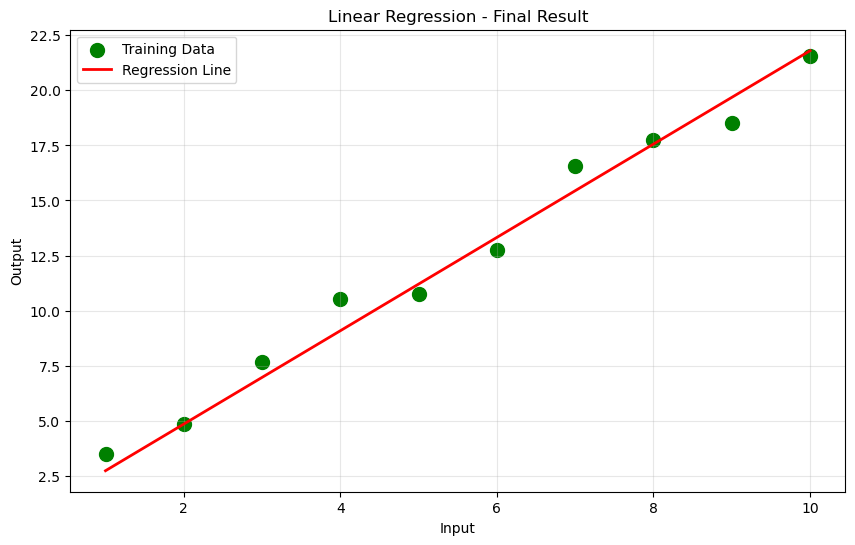

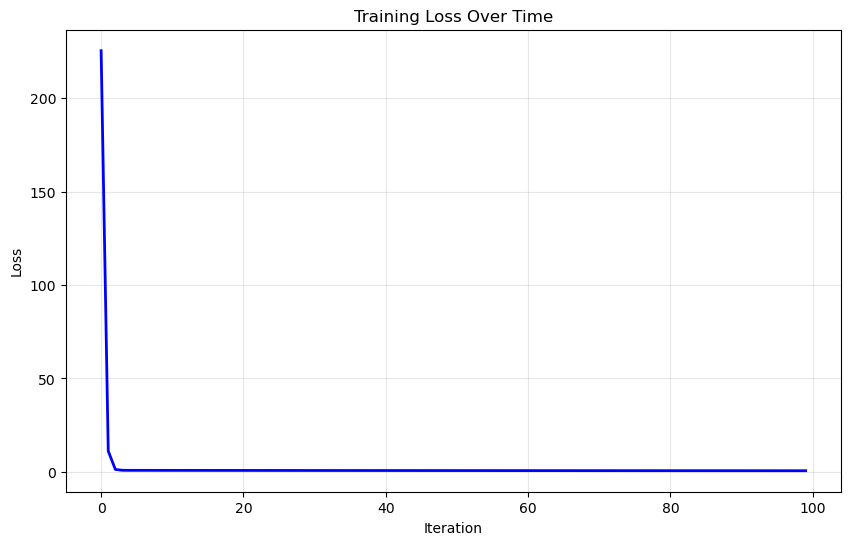


Final parameters: m = 2.1185, c = 0.6132
Final loss: 0.6347


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Step 2: Create our Linear Regression class
class LinearRegression: 
    def __init__(self): 
        """Initialize the model - create empty storage for our parameters"""
        self.parameters = {}  # This will store our m (slope) and c (intercept)
        
    def forward_propagation(self, train_input): 
        """
        STEP 1: Make predictions using current parameters
        
        This function implements: y = m*x + c
        - Takes input values (x)
        - Uses current slope (m) and intercept (c)
        - Returns predicted values (y)
        """
        m = self.parameters['m']  # Get current slope
        c = self.parameters['c']  # Get current intercept
        
        # Calculate predictions: y = m*x + c
        predictions = np.multiply(m, train_input) + c 
        return predictions 
        
    def cost_function(self, predictions, train_output): 
        """
        STEP 2: Calculate how wrong our predictions are
        
        This uses Mean Squared Error (MSE):
        - Take difference between predicted and actual values
        - Square each difference (to make all positive)
        - Take the average
        
        Lower cost = better predictions
        """
        # Calculate the error for each prediction
        errors = train_output - predictions
        
        # Square the errors and take the mean
        cost = np.mean(errors ** 2) 
        return cost 
        
    def backward_propagation(self, train_input, train_output, predictions): 
        """
        STEP 3: Calculate which direction to adjust our parameters
        
        This calculates the "gradient" - which tells us:
        - Should we increase or decrease m (slope)?
        - Should we increase or decrease c (intercept)?
        - By how much?
        """
        derivatives = {} 
        
        # Calculate the difference between predicted and actual
        df = (predictions - train_output) 
        
        # Calculate how much to change slope (m)
        # If we increase m, how much does the error change?
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        
        # Calculate how much to change intercept (c)
        # If we increase c, how much does the error change?
        dc = 2 * np.mean(df) 
        
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 
        
    def update_parameters(self, derivatives, learning_rate): 
        """
        STEP 4: Actually adjust our parameters
        
        Learning rate controls how big steps we take:
        - Too big: we might overshoot the best answer
        - Too small: we'll take forever to learn
        """
        # Update slope: move in opposite direction of gradient
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        
        # Update intercept: move in opposite direction of gradient
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 
        
    def train(self, train_input, train_output, learning_rate, iters): 
        """
        STEP 5: Put it all together - the main training loop
        
        This repeats the learning process many times:
        1. Make predictions with current parameters
        2. Calculate error (cost)
        3. Calculate which direction to improve
        4. Update parameters
        5. Repeat!
        """
        
        # Initialize parameters with small random values
        self.parameters['m'] = np.random.uniform(-1, 1)  # Random slope
        self.parameters['c'] = np.random.uniform(-1, 1)  # Random intercept
        
        self.loss = []  # Store the error at each step
        
        print("Starting training...")
        print(f"Initial parameters: m={self.parameters['m']:.4f}, c={self.parameters['c']:.4f}")
        
        # Main training loop
        for i in range(iters):
            # Step 1: Make predictions
            predictions = self.forward_propagation(train_input) 
            
            # Step 2: Calculate error
            cost = self.cost_function(predictions, train_output) 
            
            # Step 3: Calculate gradients (which direction to improve)
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            
            # Step 4: Update parameters
            self.update_parameters(derivatives, learning_rate) 
            
            # Store the error for plotting later
            self.loss.append(cost) 
            
            # Print progress every 10 iterations
            if (i + 1) % 10 == 0:
                print(f"Iteration {i + 1}: Error = {cost:.6f}, m = {self.parameters['m']:.4f}, c = {self.parameters['c']:.4f}")
        
        print("Training completed!")
        return self.parameters, self.loss

In [ ]:
# Let's create and train our model step by step
print("=== TRAINING OUR LINEAR REGRESSION MODEL ===\n")

# Create the model
linear_reg = LinearRegression()

# Train it with our data
print("Training parameters:")
print(f"- Learning rate: 0.0001 (how big steps to take)")
print(f"- Iterations: 100 (how many times to improve)")
print(f"- Training data: {len(train_input)} samples\n")

# Start training
parameters, loss_history = linear_reg.train(train_input, train_output, 
                                          learning_rate=0.0001, 
                                          iters=100)

print(f"\n=== FINAL RESULTS ===")
print(f"Final slope (m): {parameters['m']:.6f}")
print(f"Final intercept (c): {parameters['c']:.6f}")
print(f"Final error: {loss_history[-1]:.6f}")
print(f"Our line equation: y = {parameters['m']:.6f}x + {parameters['c']:.6f}")

In [ ]:
# Let's visualize what our model learned!

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Show the data and our fitted line
ax1.scatter(train_input, train_output, alpha=0.6, color='blue', label='Training Data', s=50)

# Create a smooth line for plotting
x_line = np.linspace(train_input.min(), train_input.max(), 100)
y_line = parameters['m'] * x_line + parameters['c']
ax1.plot(x_line, y_line, color='red', linewidth=3, label=f'Our Line: y = {parameters["m"]:.3f}x + {parameters["c"]:.3f}')

ax1.set_xlabel('Input (X)')
ax1.set_ylabel('Output (Y)')
ax1.set_title('Linear Regression: Data and Fitted Line')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Show how the error decreased during training
ax2.plot(loss_history, color='green', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Error (Cost)')
ax2.set_title('Learning Progress: Error Reduction Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== WHAT DO THESE PLOTS SHOW? ===")
print("Left plot: Our red line tries to fit through the blue data points")
print("Right plot: Shows how our model got better (error went down) during training")
print(f"We started with error: {loss_history[0]:.6f}")
print(f"We ended with error: {loss_history[-1]:.6f}")
print(f"Improvement: {((loss_history[0] - loss_history[-1])/loss_history[0]*100):.1f}% reduction in error!")

Iteration = 10, Loss = 0.06419245245683315
Iteration = 20, Loss = 0.06409771706456413


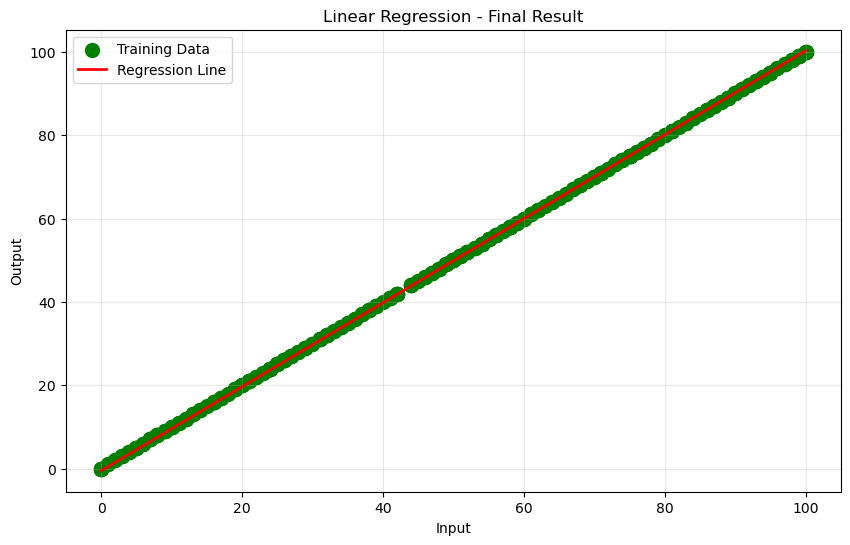

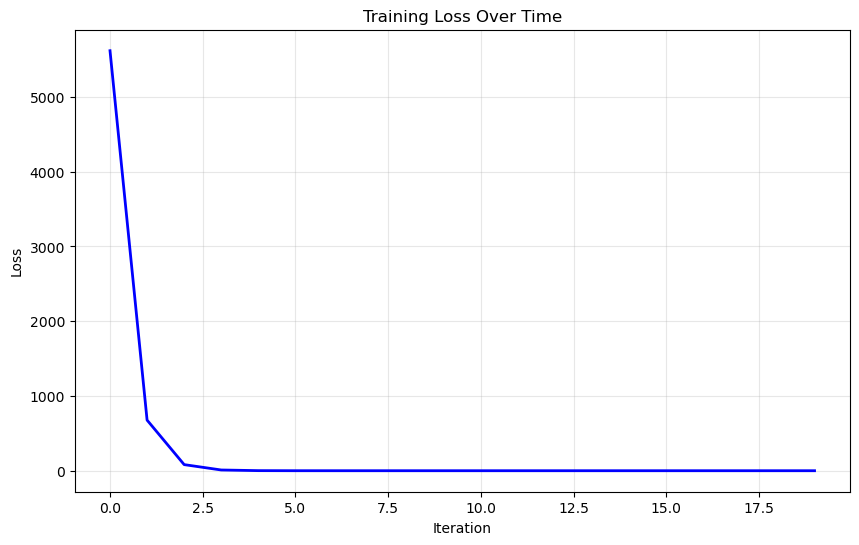

In [ ]:
# Let's test our model on new data it hasn't seen before!

print("=== TESTING OUR MODEL ===")
print("Now let's see how well our model works on NEW data (test set)")

# Make predictions on test data
test_predictions = linear_reg.forward_propagation(test_input)

# Calculate error on test data
test_error = linear_reg.cost_function(test_predictions, test_output)

print(f"Training error: {loss_history[-1]:.6f}")
print(f"Test error: {test_error:.6f}")

if test_error < loss_history[-1] * 1.2:  # If test error is within 20% of training error
    print("✅ Good! Our model generalizes well to new data")
else:
    print("⚠️ Model might be overfitting - much worse on test data")

# Visualize test predictions
plt.figure(figsize=(12, 5))

# Plot 1: Test data and predictions
plt.subplot(1, 2, 1)
plt.scatter(test_input, test_output, alpha=0.6, color='orange', label='Actual Test Data', s=50)
plt.scatter(test_input, test_predictions, alpha=0.6, color='red', label='Our Predictions', s=50)
x_line = np.linspace(test_input.min(), test_input.max(), 100)
y_line = parameters['m'] * x_line + parameters['c']
plt.plot(x_line, y_line, color='red', linewidth=2, linestyle='--', label='Our Line')
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.title('Model Testing: Predictions vs Reality')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Prediction accuracy
plt.subplot(1, 2, 2)
plt.scatter(test_output, test_predictions, alpha=0.6, color='purple')
# Perfect prediction line (if predictions = actual)
min_val, max_val = test_output.min(), test_output.max()
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== UNDERSTANDING THE RESULTS ===")
print("Left plot: Orange = real data, Red = our predictions")
print("Right plot: Points close to the diagonal line = good predictions")
print("Our model learned the pattern and can predict new data!")

In [ ]:
## 🎯 Summary: What We Accomplished

### ✅ What Our Algorithm Did:
1. **Started** with random line parameters (slope and intercept)
2. **Learned** from 500 training examples
3. **Optimized** using gradient descent to minimize prediction errors
4. **Found** the best line equation: y = mx + c
5. **Tested** on 200 new data points to verify it works

### 🧠 Key Concepts Learned:
- **Forward Propagation**: Making predictions with current parameters
- **Cost Function**: Measuring prediction errors using Mean Squared Error
- **Backward Propagation**: Calculating which direction to improve parameters
- **Gradient Descent**: The optimization algorithm that updates parameters
- **Learning Rate**: Controls how big steps we take when learning

### 🎓 Why This Matters:
- This is the **foundation** of machine learning - most advanced algorithms use similar principles
- **Gradient descent** is used in neural networks, deep learning, and many other algorithms
- Understanding the **mathematical process** helps you debug and improve models
- **Linear regression** is still widely used in business, research, and data science

### 🚀 What's Next:
- Try different learning rates and see how it affects training
- Experiment with different datasets
- Learn about regularization (Ridge, Lasso) to prevent overfitting
- Explore multiple linear regression with more input features
- Study other algorithms that build on these concepts

**Congratulations! You've implemented and understood a complete machine learning algorithm from scratch! 🎉**

# 🔬 Advanced Topics & Deep Dives

## 🧮 Mathematical Derivation of Gradients

### Detailed Backward Propagation Mathematics

Let's derive the gradient formulas step by step:

**Given:**
- Cost function: J = (1/n) Σ(ŷᵢ - yᵢ)²
- Prediction: ŷᵢ = m·xᵢ + c

**Goal:** Find ∂J/∂m and ∂J/∂c

**Step 1: Expand the cost function**
```
J = (1/n) Σ(m·xᵢ + c - yᵢ)²
```

**Step 2: Apply chain rule for ∂J/∂m**
```
∂J/∂m = (1/n) Σ 2(m·xᵢ + c - yᵢ) × ∂/∂m(m·xᵢ + c - yᵢ)
       = (1/n) Σ 2(m·xᵢ + c - yᵢ) × xᵢ
       = (2/n) Σ(ŷᵢ - yᵢ) × xᵢ
```

**Step 3: Apply chain rule for ∂J/∂c**
```
∂J/∂c = (1/n) Σ 2(m·xᵢ + c - yᵢ) × ∂/∂c(m·xᵢ + c - yᵢ)
       = (1/n) Σ 2(m·xᵢ + c - yᵢ) × 1
       = (2/n) Σ(ŷᵢ - yᵢ)
```

**Final Gradient Formulas:**
- **∂J/∂m = (2/n) Σ(ŷᵢ - yᵢ) × xᵢ**
- **∂J/∂c = (2/n) Σ(ŷᵢ - yᵢ)**

## 🎯 Real-World Applications

### 1. House Price Prediction
```python
# Features: Square footage, bedrooms, age
# Target: Price
# Use case: Real estate valuation
```

### 2. Sales Forecasting
```python
# Features: Advertising spend, seasonality, competition
# Target: Revenue
# Use case: Business planning and budgeting
```

### 3. Medical Dosage Optimization
```python
# Features: Patient weight, age, severity
# Target: Optimal drug dosage
# Use case: Personalized medicine
```

### 4. Academic Performance
```python
# Features: Study hours, attendance, previous grades
# Target: Exam score
# Use case: Educational intervention planning
```

## 🔧 Troubleshooting & Best Practices

### Common Issues and Solutions:

**1. Cost Not Decreasing:**
- **Problem**: Learning rate too high
- **Solution**: Reduce learning rate (try 0.01, 0.001)

**2. Very Slow Learning:**
- **Problem**: Learning rate too low
- **Solution**: Increase learning rate cautiously

**3. Cost Exploding:**
- **Problem**: Learning rate way too high
- **Solution**: Start with 0.01 and adjust

**4. Poor Predictions:**
- **Problem**: Non-linear relationship in data
- **Solution**: Consider polynomial features or other algorithms

### Best Practices:
1. **Feature Scaling**: Normalize inputs for faster convergence
2. **Learning Rate**: Start with 0.01, then tune
3. **Iterations**: Monitor cost - stop when it plateaus
4. **Validation**: Always test on unseen data
5. **Visualization**: Plot predictions vs actual values

## 🧪 Practice Exercises & Challenges

Try these exercises to deepen your understanding:

### 🟢 Beginner Level:
1. **Single Feature Practice**
   - Implement linear regression with one feature
   - Plot the regression line over your data
   - Calculate R² score to measure fit quality

2. **Learning Rate Experiment**
   - Try different learning rates: [0.001, 0.01, 0.1, 1.0]
   - Plot cost vs iterations for each
   - Observe convergence patterns

3. **Manual Gradient Check**
   - Calculate gradients manually for a small dataset
   - Compare with your implementation
   - Verify backward propagation correctness

### 🟡 Intermediate Level:
1. **Multiple Features**
   - Extend to handle multiple input features
   - Implement feature scaling/normalization
   - Compare performance with and without scaling

2. **Regularization**
   - Add L1 (Lasso) or L2 (Ridge) regularization
   - Study effect on overfitting
   - Compare regularized vs non-regularized models

3. **Cross-Validation**
   - Implement k-fold cross-validation
   - Find optimal learning rate and iterations
   - Plot validation curves

### 🔴 Advanced Level:
1. **Polynomial Features**
   - Generate polynomial features from linear ones
   - Fit non-linear relationships with linear regression
   - Study bias-variance tradeoff

2. **Gradient Descent Variants**
   - Implement Stochastic Gradient Descent (SGD)
   - Compare with batch gradient descent
   - Add momentum or Adam optimizer

3. **Custom Loss Functions**
   - Implement Mean Absolute Error (MAE)
   - Compare with MSE on different datasets
   - Study robustness to outliers

## 🏆 Congratulations!

You've completed a comprehensive journey through Linear Regression! You now understand:

✅ **Mathematical foundations** from first principles  
✅ **Algorithm mechanics** - how machines learn  
✅ **Implementation details** - building from scratch  
✅ **Practical applications** - real-world usage  
✅ **Advanced concepts** - gradient derivations and best practices  

### 🚀 Next Steps in Your ML Journey:

1. **Logistic Regression** - Classification problems
2. **Polynomial Regression** - Non-linear relationships  
3. **Regularization Techniques** - Preventing overfitting
4. **Neural Networks** - Building on these foundations
5. **Ensemble Methods** - Combining multiple models

Keep practicing and exploring! 🌟